In [6]:
import numpy as np
import pandas as pd

import bran

import matplotlib.pyplot as plt

%matplotlib widget

In [29]:
def get_survival_distributions(survival_times):
    out = survival_times.groupby(by="SURVIVAL_TIME").agg(len).rename({"MESSAGE_ID":"COUNT"},axis=1).reset_index(drop=False)
    out["PMF"] = out["COUNT"] / out["COUNT"].sum()
    out["CDF"] = out["PMF"].rolling(window=out.shape[0], min_periods=0).sum()
    return out

In [25]:
n = 1000
p = 0.005
Alpha = 1000
A = np.random.choice([0,1], size=n**2).reshape((n,n))

In [26]:
sim = bran.BrancherAnnihilator(A, p, Alpha)

In [27]:
test = sim.simulate()

In [30]:
df = get_survival_distributions(test)

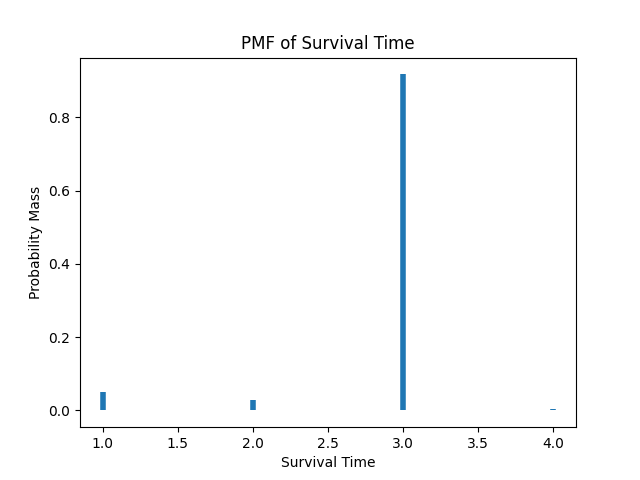

In [31]:
# Plot the PMF
plt.figure()
plt.vlines(x=df["SURVIVAL_TIME"], ymin=0, ymax=df["PMF"], linewidth=4)
plt.xlabel("Survival Time")
plt.ylabel("Probability Mass")
plt.title("PMF of Survival Time")
plt.show()

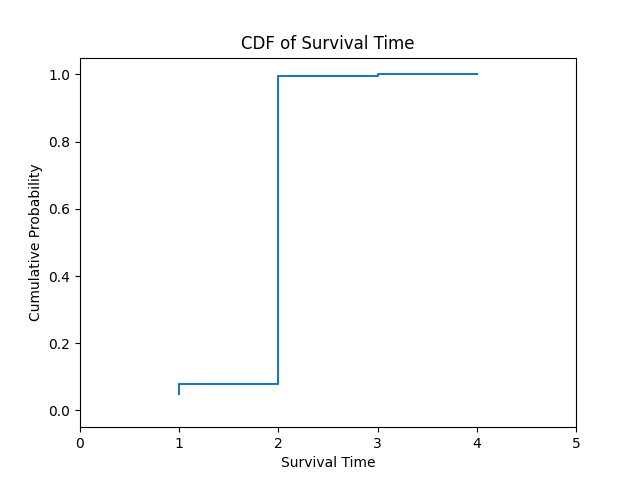

In [32]:
# Plot the CDF
plt.figure()
plt.step(x=df["SURVIVAL_TIME"], y=df["CDF"])
plt.xlabel("Survival Time")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Survival Time")
plt.xlim([0, df["SURVIVAL_TIME"].max()+1])
plt.ylim([-0.05,1.05])
plt.show()

In [ ]:
# Notice how when n increases, the range of survival times becomes narrower, and the vast majority of messages go extinct at 2 steps.
# Do we observe any significant differences in survival curves for large ER(0.5) graphs? How does this change as n --> infinity?